# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
import numpy as np
import pandas as pd

data = np.array([np.arange(2014,2041),
                [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
                 10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
                 10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
                 12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
                 13.85861 , 14.135924, 14.436149]]).transpose()
df = pd.DataFrame(data, columns=["year","cost"])
df.head()

,year,cost
0,2014.0,10.051101
1,2015.0,9.259127
2,2016.0,9.444813
3,2017.0,9.557723
4,2018.0,9.977324


1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [3]:
x=df["year"].values-2014
y=df["cost"].values

In [4]:
def obj1(beta,x,y):
    f=beta[0]*x**0+beta[1]*x
    return np.sum((y-f)**2)

def objn(beta,x,y,n):
    #f=beta[0]*x**0+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    
    #beta=[1,-2,3]
    #[1,x,x**2]
    #1-2*x+3*x**2
    f=np.dot(beta,[x**i for i in range(n+1)])
    return np.sum((y-f)**2)

In [5]:
opt.minimize?

In [6]:
beta0=np.random.rand(2)
beta0

array([0.06069858, 0.73027017])

In [7]:
beta0=np.random.rand(2)
#beta0=np.array([1,1])
sol1=opt.minimize(objn,beta0,args=(x,y,1))
sol1

      fun: 2.3704889518145187
 hess_inv: array([[ 0.07010661, -0.0039683 ],
       [-0.0039683 ,  0.00030525]])
      jac: array([-5.15580177e-06,  6.46710396e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([9.11567594, 0.18667058])

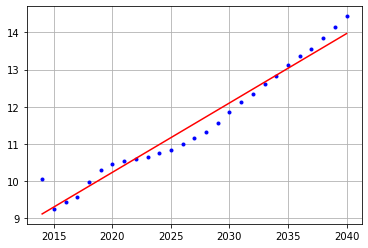

In [8]:
plt.plot(x+2014,y,'ob',ms=3)
n=1
pol=np.dot(sol1.x,[x**i for i in range(n+1)]) #evaluación de un polinomio de grado n
plt.plot(x+2014,pol,'r')
plt.grid()

In [9]:
n=3
beta0=np.random.rand(n+1)
sol2=opt.minimize(objn,beta0,args=(x,y,n))
sol2

      fun: 0.8404241918213481
 hess_inv: array([[ 2.27239255e-01, -6.41153857e-02,  4.83488239e-03,
        -1.06428249e-04],
       [-6.41153857e-02,  2.61882161e-02, -2.28212671e-03,
         5.43057251e-05],
       [ 4.83488239e-03, -2.28212671e-03,  2.13850730e-04,
        -5.32141580e-06],
       [-1.06428249e-04,  5.43057251e-05, -5.32141580e-06,
         1.36446563e-07]])
      jac: array([-0.00917643, -0.01380908, -0.25194728, -3.22118187])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 242
      nit: 5
     njev: 46
   status: 2
  success: False
        x: array([9.56544780e+00, 8.52763461e-02, 3.15248365e-03, 3.15938857e-05])

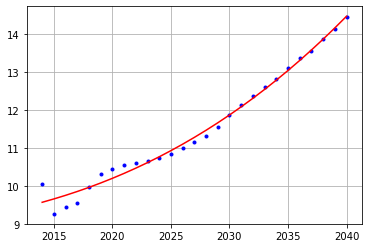

In [10]:
plt.plot(x+2014,y,'ob',ms=3)
pol=np.dot(sol2.x,[x**i for i in range(n+1)])
plt.plot(x+2014,pol,'r')
plt.grid()

In [11]:
n=3
beta0=np.random.rand(n+1)
sol3=opt.minimize(objn,beta0,args=(x,y,n))
sol3

      fun: 0.8404346759870573
 hess_inv: array([[ 2.27239550e-01, -6.41154277e-02,  4.83488404e-03,
        -1.06428265e-04],
       [-6.41154277e-02,  2.61882149e-02, -2.28212612e-03,
         5.43057056e-05],
       [ 4.83488404e-03, -2.28212612e-03,  2.13850645e-04,
        -5.32141338e-06],
       [-1.06428265e-04,  5.43057056e-05, -5.32141338e-06,
         1.36446497e-07]])
      jac: array([9.68575478e-08, 7.45058060e-08, 1.63912773e-07, 1.04308128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([9.56752301e+00, 8.46495782e-02, 3.20207479e-03, 3.04659610e-05])

In [12]:
n=1
x=2041-2014
np.dot(sol1.x,[x**i for i in range(n+1)])

14.155781540602206

In [13]:
n=3
x=2041-2014
np.dot(sol3.x,[x**i for i in range(n+1)])

14.78703565554778

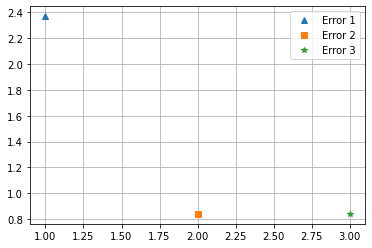

In [14]:
plt.plot(1,sol1.fun,'^',label='Error 1')
plt.plot(2,sol2.fun,'s',label='Error 2')
plt.plot(3,sol3.fun,'*',label='Error 3')
plt.legend(loc='best')
plt.grid()

In [15]:
x=df['year'].values-2014

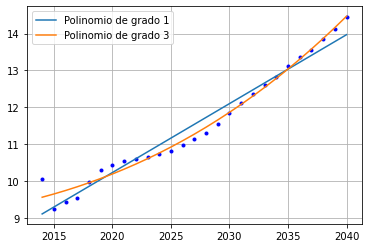

In [16]:
plt.plot(x+2014,y,'ob',ms=3) # Puntos para ajustar
n=1
pol1=np.dot(sol1.x,[x**i for i in range(n+1)]) # polinomio de grado 1

n=3
pol3=np.dot(sol3.x,[x**i for i in range(n+1)]) # polinomio de grado 3
plt.plot(x+2014,pol1,label='Polinomio de grado 1')

plt.plot(x+2014,pol3,label='Polinomio de grado 3')
plt.legend(loc='best')
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [18]:
data = pd.read_csv('population_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'population_data.csv'

In [ ]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as opt
from scipy import optimize as opt

In [ ]:
def min_sqei(beta,x,y,n):
    f_hat=np.dot(beta,[x**i for i in range (n+1)])
    sqe=np.sum((y-f_hat)**2)
    return sqe

x=data["Year"].values-1950
y=data["Población"].values 

In [ ]:
beta_1=[0,0]
beta_2=[0,0,0]
beta_3=[0,0,0,0]

In [ ]:
sol1=opt.minimize(min_sqei, beta_1, args =(x,y,1))
sol2=opt.minimize(min_sqei, beta_2, args =(x,y,2))
sol3=opt.minimize(min_sqei, beta_3, args =(x,y,3))

In [ ]:
plt.plot(x,y,"ob",ms=3)

n=1
Poli_1=np.dot(sol1.x,[x**i for i in range (n+1)])

n=2
Poli_2=np.dot(sol2.x,[x**i for i in range (n+1)])

n=3
Poli_3=np.dot(sol3.x,[x**i for i in range (n+1)])



In [ ]:
plt.plot(x, Poli_1 label = "Polinomio de grado 1")
plt.plot(x, Poli_2 label = "Polinomio de grado 2")
plt.plot(x, Poli_3 label = "Polinomio de grado 3")
plt.legend(loc = "best")
plt.grid()